# Cleaning up data to create uniform dataframe

## Import Dependencies

In [1]:
%matplotlib notebook

import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np
import tweepy
import json
import datetime
import time
import pprint as pprint
import requests
import json
import sklearn.preprocessing as skl


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Read Files into dataframes

In [78]:
twitter_file = '../Data_sources/twitter_sentiments.csv'
reddit_file = '../Data_sources/reddit_df.csv'
bitcoin_file = '../Data_sources/btc_historical.csv'

twitter_df = pd.read_csv(twitter_file)
reddit_df = pd.read_csv(reddit_file)
bitcoin_df = pd.read_csv(bitcoin_file)

#### view dataframes

In [79]:
bitcoin_df.head()

,Date,Open,High,Low,Close,Volume,Change,% Change
0,7/15/2018,NaN,6378.0,6378.0,6362,0,104.94,1.68%
1,7/14/2018,NaN,6166.0,6166.0,6257,0,52.00,0.84%
2,7/13/2018,NaN,6166.0,6166.0,6205,0,82.72,1.35%
3,7/12/2018,NaN,6166.0,6166.0,6122,0,-253.70,-3.98%
4,7/11/2018,NaN,6368.0,6368.0,6376,0,6.85,0.11%


In [80]:
reddit_df.head()

,Compound Score,Date Created,Title,Date
0,0.0000,1531605972,"Daily Discussion, July 14, 2018",14-Jul-18
1,-0.6322,1531605949,"Daily Discussion, July 14, 2018",14-Jul-18
2,0.4019,1531605877,"Daily Discussion, July 14, 2018",14-Jul-18
3,0.4588,1531605785,"Daily Discussion, July 14, 2018",14-Jul-18
4,0.8074,1531605777,"Daily Discussion, July 14, 2018",14-Jul-18


In [81]:
twitter_df.head()

,Unnamed: 0,Compound,Date,Text
0,0,-0.4703,2006-12-11 12:38:07,"Closer up we have a breakout target of 6840, s..."
1,1,0.0000,2007-07-31 00:12:41,RT @Pivotal_Pivots: Is the IHS on Bitcoin $BTC...
2,2,-0.5848,2007-08-11 03:11:33,RT @ClassicEthereum: 🔥 Drop #Altcoins : Buy $E...
3,3,0.1027,2007-11-10 11:30:35,Binance Exchange Backs First-Ever Decentralize...
4,4,0.6249,2008-03-08 09:58:18,Inverse head and shoulders pattern clearly in ...


### Convert Time Frames to Daily TimeStamp

In [82]:
def convert_time (time):
    new_time = datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S")
    new_time = new_time.strftime('%Y-%m-%d')
    return new_time

In [83]:
for x in range(len(twitter_df['Date'])):
    date = convert_time(twitter_df.loc[x,'Date'])
    #print(date)
    twitter_df.loc[x, 'Date'] = date 
    
twitter_df.head()

,Unnamed: 0,Compound,Date,Text
0,0,-0.4703,2006-12-11,"Closer up we have a breakout target of 6840, s..."
1,1,0.0000,2007-07-31,RT @Pivotal_Pivots: Is the IHS on Bitcoin $BTC...
2,2,-0.5848,2007-08-11,RT @ClassicEthereum: 🔥 Drop #Altcoins : Buy $E...
3,3,0.1027,2007-11-10,Binance Exchange Backs First-Ever Decentralize...
4,4,0.6249,2008-03-08,Inverse head and shoulders pattern clearly in ...


### Group by Date and average Compound

In [84]:
twitter_df = twitter_df.groupby('Date').mean()
twitter_df.head()

,Unnamed: 0,Compound
Date,,
2006-12-11,0.0,-0.4703
2007-07-31,1.0,0.0000
2007-08-11,2.0,-0.5848
2007-11-10,3.0,0.1027
2008-03-08,4.0,0.6249


In [85]:
twitter_df.to_csv('../Data_sources/twitter_df.csv')

In [89]:
new_df = twitter_df.ix['2018-04-01':'2018-07-16']

C:\Users\thema\Anaconda3\envs\PythonNoob\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


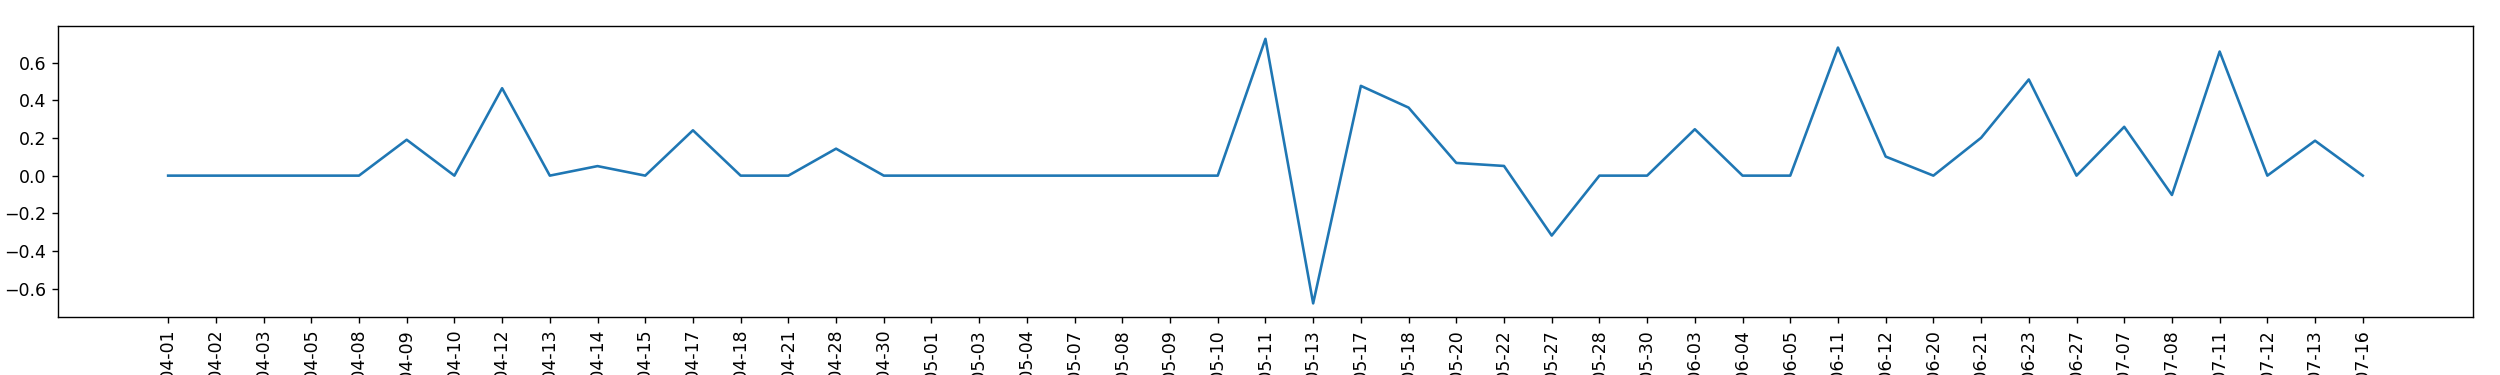

In [94]:
x = new_df.index.values
y = new_df['Compound']

# Set x axis and tick locations
x_axis = np.arange(len(new_df))
tick_locations = [value for value in x_axis]

# Set x axis and tick locations
x_axis = np.arange(len(new_df))
#tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
#plt.bar(x, new_df["Compound"], color='r', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

plt.plot(new_df.index.values, new_df['Compound'])
plt.show()
plt.savefig('../Output/Twitter_sentiment_apr-jul.png')